# **Data Description**

**Description:**

Data used for this problem in this dataset:

- **CombinedNewsDJIA.csv**: two columns
The first column is "Date", the second is "Label", and the following ones are news headlines ranging from "Top1" to "Top25".
All news are ranked from top to bottom based on how hot they are.
Hence, there are 25 lines for each date. The news headlines has been obtained by crawling historical news headlines from Reddit WorldNews Channel (/r/worldnews). They are ranked by reddit users' votes, and only the top 25 headlines are considered for a single date.(Range: 2008-06-08 to 2016-07-01)


=========================================

This a binary classification task. Hence, there are only two labels:
- "1" when Adj Close value rose or stayed as the same;
- "0" when Adj Close value decreased.

=========================================




# **Import Libraries and Load Dataset**

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import re
#import bz2file as bz2 

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,confusion_matrix, plot_confusion_matrix,classification_report
from sklearn.metrics import plot_confusion_matrix

import pickle

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df_news = pd.read_csv('/content/Combined_News_DJIA.csv')

# **Data Exploration**

In [ ]:
train = df_news[df_news['Date'] < '20150101']
test = df_news[df_news['Date'] > '20141231']

In [ ]:
# Removing punctuations
data=train.iloc[:,2:27]
data.replace("[^a-zA-Z]"," ",regex=True, inplace=True)

# Renaming column names for ease of access
list1= [i for i in range(25)]
new_Index=[str(i) for i in list1]
data.columns= new_Index
data.head(5)

In [ ]:
# Convertng headlines to lower case
for col in data.columns:
    data[col]=data[col].str.lower()
data.head(1)

In [ ]:
train_headlines = []
for row in range(0,len(data.index)):
    train_headlines.append(' '.join(str(x) for x in data.iloc[row,0:25]))

# **Modeling**

In [ ]:
# BAG OF WORDS
countvector=CountVectorizer(ngram_range=(2,2))
traindataset=countvector.fit_transform(train_headlines)

In [ ]:
# Assign training data
X_train = traindataset
y_train = train.Label

In [ ]:
# Use classifier for training
rf = RandomForestClassifier(n_estimators=300,
                            criterion='entropy')
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=300)

In [ ]:
# Combine columns from Top1 to Top25 for test_data
test_headlines = []
for row in range(0, len(test.index)):
    test_headlines.append(' '.join(str(x) for x in test.iloc[row,2:]))

In [ ]:
#convert text data into vectors
testdataset = countvector.transform(test_headlines)

In [ ]:
#predict the target
predictions = rf.predict(testdataset)

In [ ]:
y_test = test['Label']

In [ ]:
score=accuracy_score(test['Label'],predictions)
print('Accuracy : ', score)
report=classification_report(test['Label'],predictions)
print(report)

Accuracy :  0.8518518518518519
              precision    recall  f1-score   support

           0       0.99      0.70      0.82       186
           1       0.78      0.99      0.87       192

    accuracy                           0.85       378
   macro avg       0.88      0.85      0.85       378
weighted avg       0.88      0.85      0.85       378



(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fdbb8d6aee0>)

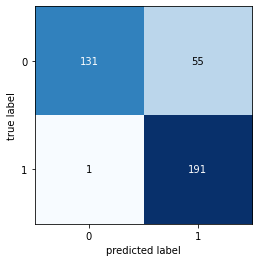

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(confusion_matrix(y_test, predictions))

# **Save the model**

In [ ]:
import bz2file as bz2 

def compressed_pickle(title, data):
  with bz2.BZ2File(title + '.pbz2', 'w') as f:
    pickle.dump(data, f)

compressed_pickle('senti-cv', countvector)

compressed_pickle('senti-model', rf)